# '따릉이' 날씨 정보와의 관계 분석

## 분석파일 : SeoulBikeData.csv

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
### colab : matplotlib 한글 인식 (방법1)

# 한글 폰트 설치

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (43.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121658 files and direc

In [1]:
### 폰트 설치 후에 '런타임' > '세션 다시 시작' 하여 --> 여기서부터 ("이후 셀 실행")

### 설치한 나눔폰트로 설정 변경하기

## 필요한 함수 / 라이브러리 import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import warnings
warnings.filterwarnings('ignore')

# 폰트 지정 : 나눔바른고딕 폰트로 바꾸기
plt.rc('font', family='NanumBarunGothic')

# 설정된 font.family 확인하기
plt.rcParams['font.family']

['NanumBarunGothic']

## 데이터 불러오기

In [2]:
### 다운로드 받은 CSV파일 읽기

# 필요한 라이브러리 import
import pandas as pd

# 파일 경로 설정

### 대여정보 파일 불러오기 (날씨 정보 포함)
file3_path='/content/drive/MyDrive/KDT/MINI Project/SeoulBikeData.csv'

# pd.read_excel() -> DataFrame 생성
df_weather_org = pd.read_csv(file3_path, encoding='cp949')

# DataFrame 내용 확인
df_weather_org.head(2)

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## 데이터의 전반적인 정보

In [3]:
# 데이터의 전반적인 정보
print(f'날씨 파일 모양 = {df_weather_org.shape}')
print('-'*80)

print(f'columns = {df_weather_org.columns}')

날씨 파일 모양 = (8760, 14)
--------------------------------------------------------------------------------
columns = Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(캜)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(캜)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


## 데이터 전처리

### 누락 데이터 확인 및 처리

In [4]:
### 누락 데이터 확인
print(df_weather_org.isnull().sum())  # 오호 누락데이터 없음 ^^

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(캜)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(캜)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64


## Feature Engineering

### 데이터 구성 -> 사용할 컬럼만 DataFrame 다시 구성

In [5]:
### 데이터 구성 -> 사용할 컬럼만 DataFrame 다시 구성

# 'Dew point temperature(캜)'이슬점, 'Solar Radiation (MJ/m2)'(자외선), 'Functioning Day' 우선 drop -> 필요시 다시 합치자
df_weather = df_weather_org.drop(['Dew point temperature(캜)', 'Solar Radiation (MJ/m2)', 'Functioning Day'], axis=1)

# 단위가 깨진 글자로 나오는 컬럼이름 포함 전체 컬럼 이름을 한글로 변경
df_weather.columns=['날짜','대여건수','시간','기온','습도','풍속','가시거리(10m)','강우량(mm)','강설량(cm)','계절','휴일']

df_weather.iloc[2000:2002, :]

,날짜,대여건수,시간,기온,습도,풍속,가시거리(10m),강우량(mm),강설량(cm),계절,휴일
2000,22/02/2018,783,8,-3.6,63,0.9,1473,0.0,0.0,Winter,No Holiday
2001,22/02/2018,383,9,-1.9,51,0.9,1654,0.0,0.0,Winter,No Holiday


### 계절 컬럼 numeric화

In [6]:
### 계절 수치화 -> replace

df_weather.replace({'계절': {'Spring':1,'Summer':2,'Autumn':3,'Winter':4}}, inplace=True)

### 데이터 형변환 필요한 컬럼

In [7]:
### 데이터 형변환이 필요한 지 검토

df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   날짜         8760 non-null   object 
 1   대여건수       8760 non-null   int64  
 2   시간         8760 non-null   int64  
 3   기온         8760 non-null   float64
 4   습도         8760 non-null   int64  
 5   풍속         8760 non-null   float64
 6   가시거리(10m)  8760 non-null   int64  
 7   강우량(mm)    8760 non-null   float64
 8   강설량(cm)    8760 non-null   float64
 9   계절         8760 non-null   int64  
 10  휴일         8760 non-null   object 
dtypes: float64(4), int64(5), object(2)
memory usage: 752.9+ KB


In [8]:
### 날짜 컬럼 object -> datetime 으로 변경
df_weather['날짜'] = pd.to_datetime(df_weather['날짜'])

### 컬럼 추가하기

In [9]:
### '날짜' 컬럼을 활용해서 '년', '월', '일, '요일 컬럼 추가

df_weather['년'] = df_weather['날짜'].dt.year
df_weather['월'] = df_weather['날짜'].dt.month
df_weather['일'] = df_weather['날짜'].dt.day
df_weather['요일'] = df_weather['날짜'].dt.weekday

# 컬럼 추가 결과 확인
df_weather.iloc[2000:2002, :]

,날짜,대여건수,시간,기온,습도,풍속,가시거리(10m),강우량(mm),강설량(cm),계절,휴일,년,월,일,요일
2000,2018-02-22,783,8,-3.6,63,0.9,1473,0.0,0.0,4,No Holiday,2018,2,22,3
2001,2018-02-22,383,9,-1.9,51,0.9,1654,0.0,0.0,4,No Holiday,2018,2,22,3


## 데이터 탐색

### [1] 년,월,일,요일별 대여건수 시각화

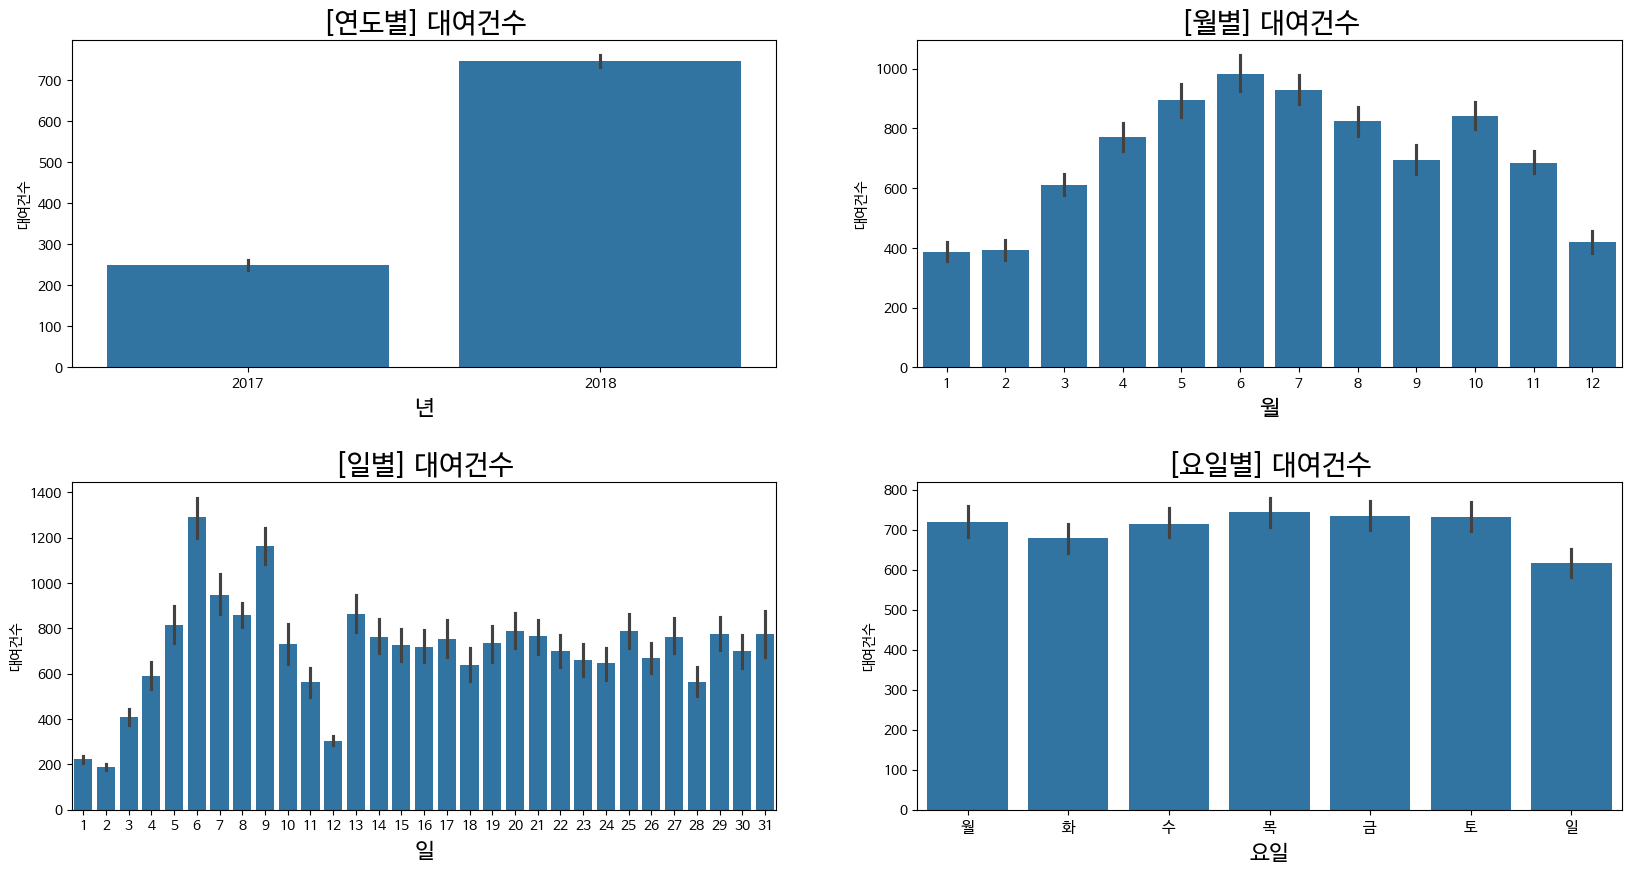

In [10]:
### [1] 년,월,일,요일별 대여건수 시각화 (방법1)

fig, ax = plt.subplots(2, 2, figsize=(20,10))

# 위쪽 subplot의 x축 label과 아래 subplolt의 title이 겹쳐서 간격을 조절해 보자
plt.subplots_adjust(hspace=0.35)

# 연도별
sns.barplot(data=df_weather, x='년', y='대여건수', ax=ax[0][0])
ax[0][0].set_title('[연도별] 대여건수', size=20)
ax[0][0].set_xlabel('년', fontsize=16)

# 월별
sns.barplot(data=df_weather, x='월', y='대여건수', ax=ax[0][1])
ax[0][1].set_title('[월별] 대여건수', size=20)
ax[0][1].set_xlabel('월', fontsize=16)

# 일별
sns.barplot(data=df_weather, x='일', y='대여건수', ax=ax[1][0])
ax[1][0].set_title('[일별] 대여건수', size=20)
ax[1][0].set_xlabel('일', fontsize=16)

# 요일별
sns.barplot(data=df_weather, x='요일', y='대여건수', ax=ax[1][1])
ax[1][1].set_title('[요일별] 대여건수', size=20)
day_order = ["월", "화", "수", "목", "금", "토", "일"]
ax[1][1].set_xticklabels(day_order, fontsize=11)
ax[1][1].set_xlabel('요일', fontsize=16)

plt.show()

### [2] 계절, 휴일에 따른 대여건수 시각화

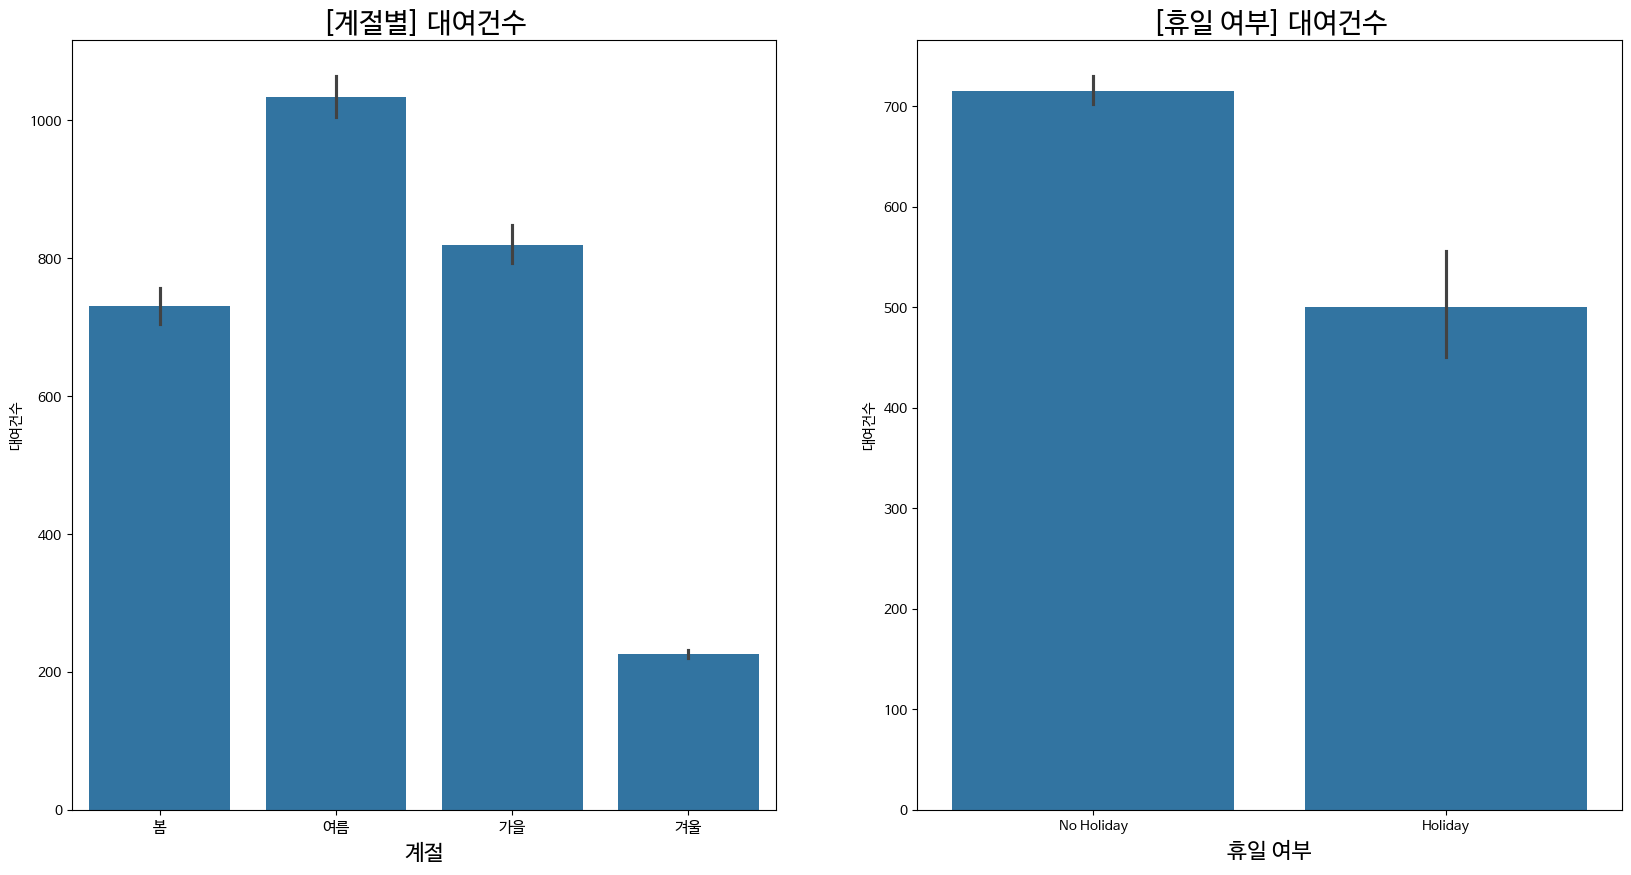

In [11]:
### [2] 계절, 휴일에 따른 대여건수 시각화

fig, ax = plt.subplots(1, 2, figsize=(20,10))

# 계절별
sns.barplot(data=df_weather, x='계절', y='대여건수', ax=ax[0])
ax[0].set_title('[계절별] 대여건수', size=20)
season_order = ["봄", "여름", "가을", "겨울"]
ax[0].set_xticklabels(season_order, fontsize=11)
ax[0].set_xlabel('계절', fontsize=16)

# 휴일 유무유무1 ==========> 평균을 계산해서 다시 시각화 하자
sns.barplot(data=df_weather, x='휴일', y='대여건수', ax=ax[1])
ax[1].set_title('[휴일 여부] 대여건수', size=20)
ax[1].set_xlabel('휴일 여부', fontsize=16)

plt.show()

### [3] 기온, 습도, 풍속, 가시거리, 강우량, 강설량에 따른 대여건수 시각화

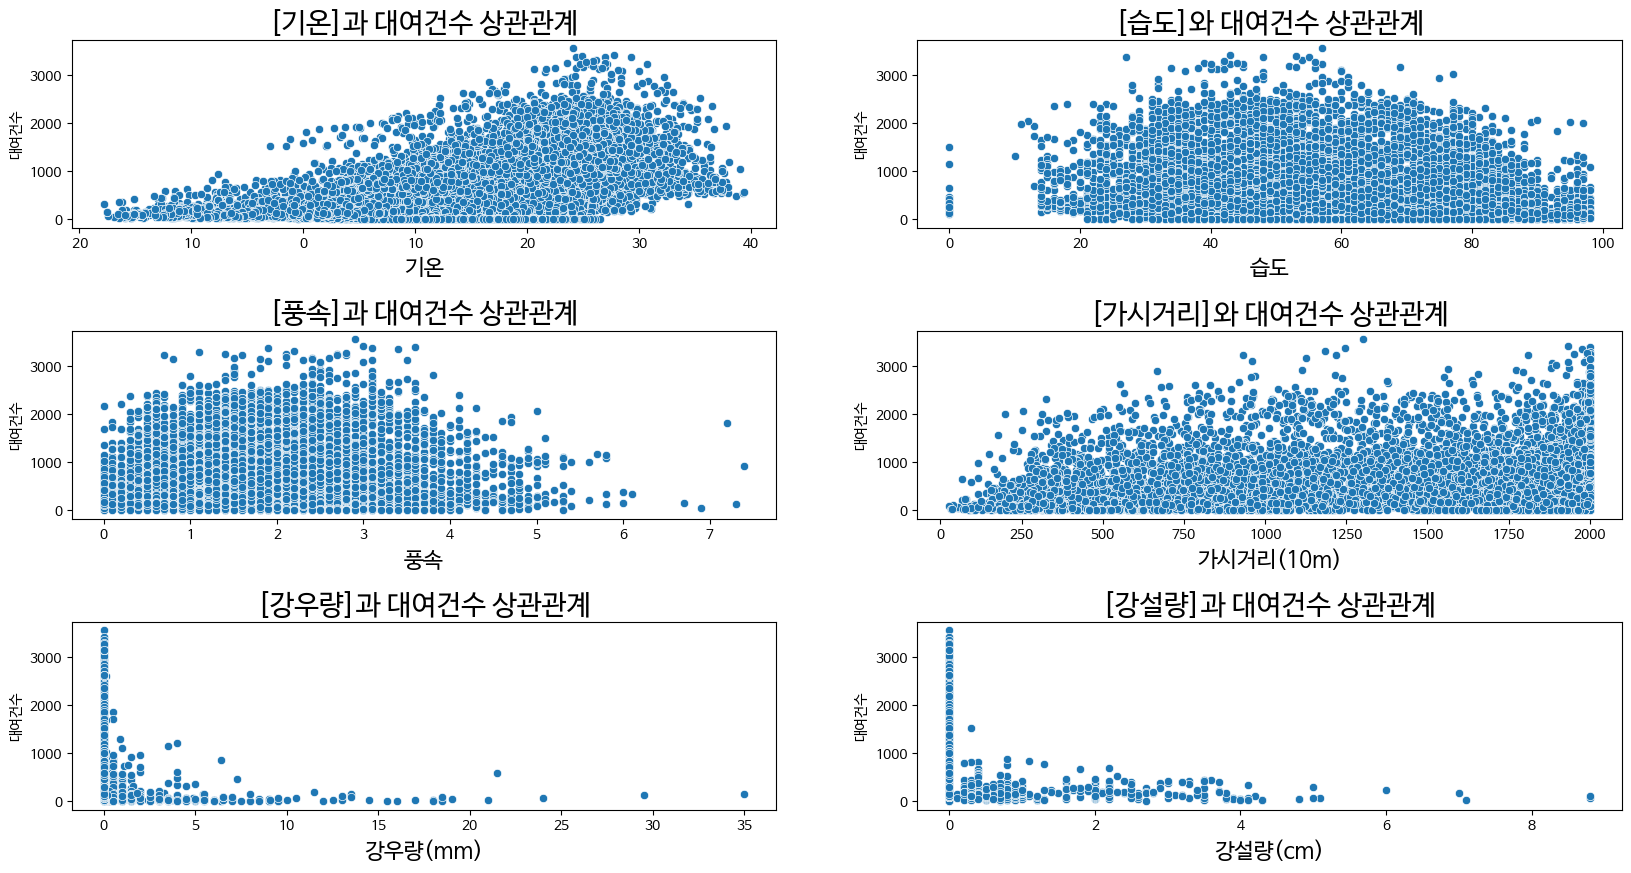

In [12]:
### [3] 기온, 습도, 풍속, 가시거리, 강우량, 강설량에 따른 대여건수 시각화

fig, ax = plt.subplots(3, 2, figsize=(20,10))

# 위쪽 subplot의 x축 label과 아래 subplolt의 title이 겹쳐서 간격을 조절해 보자
plt.subplots_adjust(hspace=0.55)

# 기온
sns.scatterplot(data=df_weather, x='기온', y='대여건수', ax=ax[0][0])
ax[0][0].set_title('[기온]과 대여건수 상관관계', size=20)
ax[0][0].set_xlabel('기온', fontsize=16)

sns.scatterplot(data=df_weather, x='습도', y='대여건수', ax=ax[0][1])
ax[0][1].set_title('[습도]와 대여건수 상관관계', size=20)
ax[0][1].set_xlabel('습도', fontsize=16)

# 풍속
sns.scatterplot(data=df_weather, x='풍속', y='대여건수', ax=ax[1][0])
ax[1][0].set_title('[풍속]과 대여건수 상관관계', size=20)
ax[1][0].set_xlabel('풍속', fontsize=16)

# 가시거리
sns.scatterplot(data=df_weather, x='가시거리(10m)', y='대여건수', ax=ax[1][1])
ax[1][1].set_title('[가시거리]와 대여건수 상관관계', size=20)
ax[1][1].set_xlabel('가시거리(10m)', fontsize=16)

# 강우량
sns.scatterplot(data=df_weather, x='강우량(mm)', y='대여건수', ax=ax[2][0])
ax[2][0].set_title('[강우량]과 대여건수 상관관계', size=20)
ax[2][0].set_xlabel('강우량(mm)', fontsize=16)

# 강설량
sns.scatterplot(data=df_weather, x='강설량(cm)', y='대여건수', ax=ax[2][1])
ax[2][1].set_title('[강설량]과 대여건수 상관관계', size=20)
ax[2][1].set_xlabel('강설량(cm)', fontsize=16)

plt.show()


### [4]대여수,시간,날씨 연관성 시각화

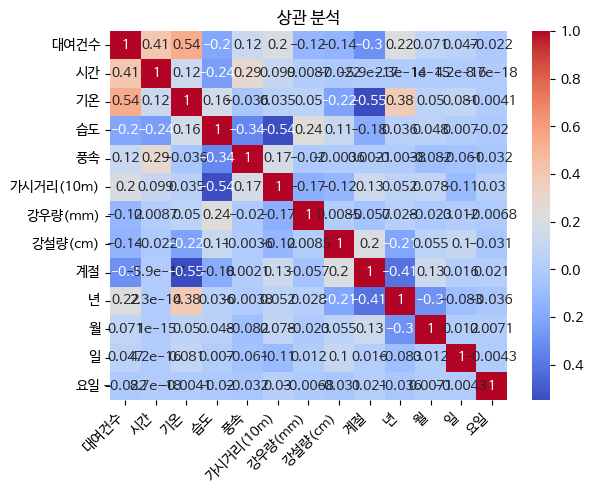

'\n어두운 파란색은 강한 음의 상관 관계를 나타냅니다(거의 -1에 가까움).\n어두운 빨간색은 강한 양의 상관 관계를 나타냅니다(거의 1에 가까움).\n'

In [13]:
#Correlation Analysis

correlation_matrix=df_weather.corr()
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm')

plt.xticks(rotation=45, ha='right')
plt.title('상관 분석')

plt.show()

'''
어두운 파란색은 강한 음의 상관 관계를 나타냅니다(거의 -1에 가까움).
어두운 빨간색은 강한 양의 상관 관계를 나타냅니다(거의 1에 가까움).
'''